In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics

%matplotlib inline

In [22]:
import regex as re
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier

In [3]:
train = pd.read_csv('../../data/train.csv')
spray = pd.read_csv('../../data/spray.csv')
weather = pd.read_csv('../../data/weather.csv')
test = pd.read_csv('../../data/test.csv')

In [5]:
train.head(10)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [17]:
test['AddressAccuracy'].value_counts()

8    61973
9    39795
5    13761
3      764
Name: AddressAccuracy, dtype: int64

In [14]:
train.loc[train['AddressAccuracy'] == 3].head(12)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
69,2007-06-05,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0
127,2007-06-26,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0
179,2007-06-29,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0
237,2007-07-02,"Chicago, IL, USA",CULEX SALINARIUS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0
342,2007-07-11,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0
343,2007-07-11,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0
557,2007-07-19,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0
728,2007-07-27,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,4,0
729,2007-07-27,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,2,0
929,2007-08-01,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,6,0


In [ ]:
# split date into week, month, year. apply to all datasets

In [52]:
spray.duplicated().sum()

541

In [56]:
spray.drop_duplicates(inplace=True)

In [57]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [62]:
spray.loc[spray['Time'].isnull()]

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
...,...,...,...,...
1609,2011-09-07,NaN,41.995876,-87.811615
1610,2011-09-07,NaN,41.995972,-87.810271
1611,2011-09-07,NaN,41.995684,-87.810319
1612,2011-09-07,NaN,41.994724,-87.810415


In [70]:
pd.to_datetime(spray['Time'].dropna())

95      2021-03-30 19:52:52
96      2021-03-30 19:53:02
97      2021-03-30 19:53:12
98      2021-03-30 19:53:22
99      2021-03-30 19:53:32
                ...        
14830   2021-03-30 20:34:11
14831   2021-03-30 20:35:01
14832   2021-03-30 20:35:21
14833   2021-03-30 20:35:31
14834   2021-03-30 20:35:41
Name: Time, Length: 13615, dtype: datetime64[ns]

drop time column? since train & test values only have date

In [40]:
train.loc[:, ['NumMosquitos', 'WnvPresent']].corr()

,NumMosquitos,WnvPresent
NumMosquitos,1.00000,0.19682
WnvPresent,0.19682,1.00000


drop numMosquitos? got some correlation but test set got no nummosquitos.

In [27]:
train.loc[train['NumMosquitos'] > 49] # combine

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
350,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10240,2013-09-12,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1
10242,2013-09-12,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,0
10259,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0
10262,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0


In [24]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [6]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [7]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [33]:
weather['PrecipTotal'].value_counts().sort_values().head(20)

6.64    1
0.62    1
3.31    1
1.75    1
1.57    1
1.90    1
2.03    1
2.43    1
1.88    1
0.76    1
3.17    1
2.60    1
1.96    1
2.06    1
1.22    1
4.73    1
1.19    1
0.90    1
3.07    1
1.06    1
Name: PrecipTotal, dtype: int64

In [8]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [45]:
weather.isin(['M']).sum().sort_values(ascending=False)

Water1         2944
Depart         1472
SnowFall       1472
Depth          1472
Tavg             11
Cool             11
Heat             11
SeaLevel          9
StnPressure       4
WetBulb           4
AvgSpeed          3
PrecipTotal       2
Date              0
Tmax              0
Tmin              0
Sunrise           0
DewPoint          0
ResultDir         0
Sunset            0
CodeSum           0
ResultSpeed       0
Station           0
dtype: int64

In [29]:
weather.loc[weather['PrecipTotal'].isin(['M'])]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
117,2,2007-06-28,73,61,67,M,56,61,0,2,...,,M,M,M,M,29.43,30.07,12.2,2,13.3
119,2,2007-06-29,71,56,64,M,56,60,1,0,...,,M,M,M,M,29.47,30.11,7.4,2,8.2


In [36]:
weather.groupby('Station')['SnowFall'].value_counts() # drop

Station  SnowFall
1        0.0         1459
           T           12
         0.1            1
2        M           1472
Name: SnowFall, dtype: int64

In [37]:
weather.groupby('Station')['Depth'].value_counts() # drop

Station  Depth
1        0        1472
2        M        1472
Name: Depth, dtype: int64

In [38]:
weather.groupby('Station')['Water1'].value_counts() # drop

Station  Water1
1        M         1472
2        M         1472
Name: Water1, dtype: int64

In [39]:
weather.groupby('Station')['Depart'].value_counts() # take value from station 1

Station  Depart
1         2          93
         -1          84
         -2          80
          5          77
          1          76
          7          76
          3          75
          0          74
         -3          72
          4          71
          6          67
          8          59
         -5          57
         -4          56
         -6          50
          9          47
         10          46
         -8          43
         -7          30
         11          28
         12          28
         -9          25
         13          23
         -10         22
         14          22
         15          15
         16          12
         -11         10
         -12          8
         17           7
         -14          6
         18           6
         -13          5
         19           4
         20           4
         -15          3
         -16          3
         22           3
         -17          2
         21           2
         23           1


impute the rest (mean/median by time period, week?)

In [82]:
weather.groupby('Station')['Sunrise'].value_counts()

Station  Sunrise
1        0416        104
         0417         64
         0419         40
         0418         32
         0420         32
                    ... 
         0619          8
         0620          8
         0622          8
         0623          8
2        -          1472
Name: Sunrise, Length: 122, dtype: int64

In [83]:
weather.groupby('Station')['Sunset'].value_counts()

Station  Sunset
1        1931        96
         1930        56
         1929        48
         1923        32
         1925        32
                   ... 
         1900         8
         1901         8
         1905         8
         1912         8
2        -         1472
Name: Sunset, Length: 119, dtype: int64

combine sunrise & sunset into total sun hours? dont drop yet

In [76]:
weather['CodeSum'].value_counts().head(20)

                 1609
RA                296
RA BR             238
BR                110
TSRA RA BR         92
BR HZ              81
RA DZ BR           65
TSRA RA            43
HZ                 39
RA BR HZ           38
TSRA               34
RA DZ              22
TSRA BR            21
TS TSRA RA BR      19
RA HZ              16
TS RA              13
TSRA RA BR HZ      12
DZ BR              10
TS TSRA BR         10
TS                 10
Name: CodeSum, dtype: int64

need to engineer this codesum feature, group the codes by type e.g. snow, wind, rain, fog, others? use our sense to see which are relevant to mosquitos. or just 'one-hot' by code, multiple codes will have 1s in multiple columns

In [47]:
from geopy.distance import distance

In [18]:
station1 = [41.995, -87.933]
station2 = [41.786, -87.752]

In [49]:
distance(station1, station2).km

27.65019841836611

27km away only, combine station 1 & 2 readings

In [ ]:
# combine temp, depart, heating, cooling, precip, sealevelpressure, avgspeed into avg rolling week?

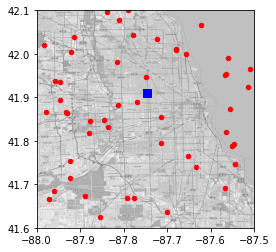

In [10]:
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("../../data/mapdata_copyright_openstreetmap_contributors.txt")


# generate some data to overlay
numPoints = 50
lats = (upperRight[0] - origin[0]) * np.random.random_sample(numPoints) + origin[0]
longs = (upperRight[1] - origin[1]) * np.random.random_sample(numPoints) + origin[1]

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=longs, y=lats, c='r', s=20)
plt.scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s')


In [28]:
# drop the spray locations outside boundaries
spray.drop(index=spray.loc[(spray['Latitude'] > 42.1) | (spray['Longitude'] < -88)].index, inplace=True)

In [9]:
wnv = train.loc[train['WnvPresent'] == 1, ['Latitude', 'Longitude']]

Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

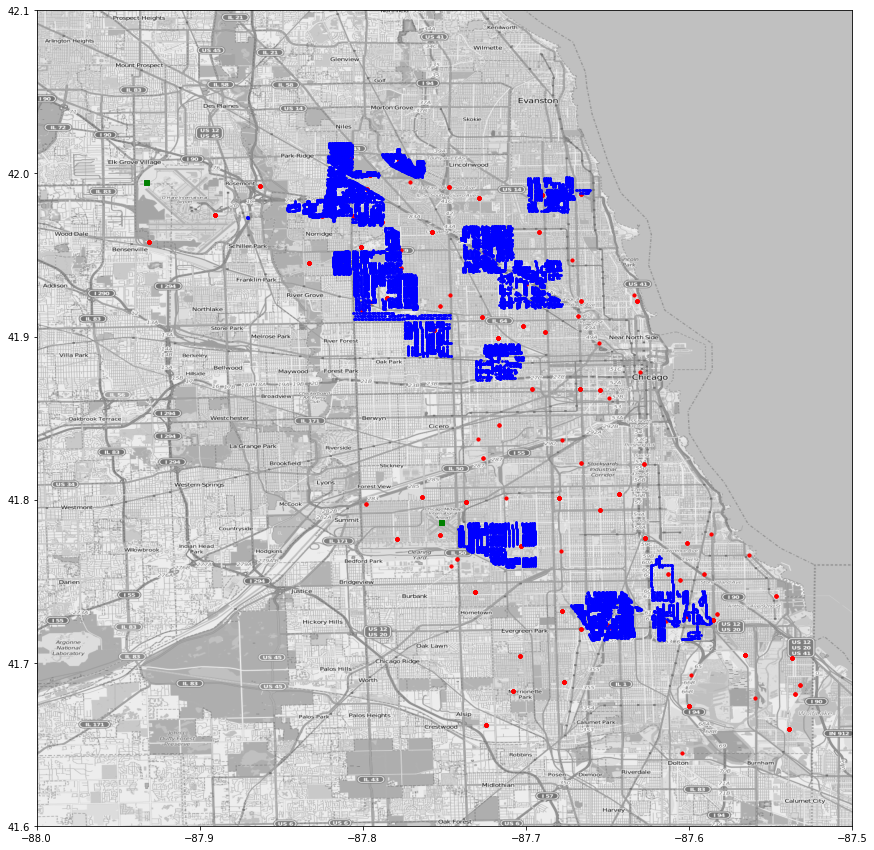

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=wnv['Longitude'], y=wnv['Latitude'], c='r', s=10)
plt.scatter(x=spray['Longitude'], y=spray['Latitude'], c='b', s=3)
plt.scatter(x=station1[1], y=station1[0], c='g', s=25, marker='s')
plt.scatter(x=station2[1], y=station2[0], c='g', s=25, marker='s')

importance of geo location? wait for lesson

EDA

In [71]:
# Plot wnvpresent (total distribution) against week of year

In [72]:
# Plot wnvpresent against species of mosquito, then convert to ordinal

In [73]:
# Plot wnvpresent (per year) against week of year, then add lines to show which week was sprayed
# Same for numMosquitos

Temporal features - create based on mosquito info? e.g. incubation period. create time-lagged variables (1 week to 1 month lag)
- binary variables also (e.g. sprayed in the past week, month, etc)*
        * depends on geo location also?

In [4]:
test

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
...,...,...,...,...,...,...,...,...,...,...,...
116288,116289,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX SALINARIUS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116289,116290,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX TERRITANS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116290,116291,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX TARSALIS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116291,116292,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",UNSPECIFIED CULEX,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8


In [13]:
testing = test[['Date', 'Trap', 'Species']]

In [14]:
testing.head()

,Date,Trap,Species
0,2008-06-11,T002,CULEX PIPIENS/RESTUANS
1,2008-06-11,T002,CULEX RESTUANS
2,2008-06-11,T002,CULEX PIPIENS
3,2008-06-11,T002,CULEX SALINARIUS
4,2008-06-11,T002,CULEX TERRITANS


In [19]:
testing.iloc[928:938]

,Date,Trap,Species
928,2008-06-11,T009,CULEX PIPIENS/RESTUANS
929,2008-06-11,T009,CULEX RESTUANS
930,2008-06-11,T009,CULEX PIPIENS
931,2008-06-11,T009,CULEX SALINARIUS
932,2008-06-11,T009,CULEX TERRITANS
933,2008-06-11,T009,CULEX TARSALIS
934,2008-06-11,T009,UNSPECIFIED CULEX
935,2008-06-11,T009,CULEX ERRATICUS
936,2008-06-11,T900,CULEX PIPIENS/RESTUANS
937,2008-06-11,T900,CULEX RESTUANS


In [21]:
testing.loc[(testing['Date'] == '2008-06-11') & (testing['Trap'] == 'T009')]

,Date,Trap,Species
144,2008-06-11,T009,CULEX PIPIENS/RESTUANS
145,2008-06-11,T009,CULEX RESTUANS
146,2008-06-11,T009,CULEX PIPIENS
147,2008-06-11,T009,CULEX SALINARIUS
148,2008-06-11,T009,CULEX TERRITANS
149,2008-06-11,T009,CULEX TARSALIS
150,2008-06-11,T009,UNSPECIFIED CULEX
151,2008-06-11,T009,CULEX ERRATICUS
928,2008-06-11,T009,CULEX PIPIENS/RESTUANS
929,2008-06-11,T009,CULEX RESTUANS


In [15]:
testing.loc[testing.duplicated()]

,Date,Trap,Species
928,2008-06-11,T009,CULEX PIPIENS/RESTUANS
929,2008-06-11,T009,CULEX RESTUANS
930,2008-06-11,T009,CULEX PIPIENS
931,2008-06-11,T009,CULEX SALINARIUS
932,2008-06-11,T009,CULEX TERRITANS
...,...,...,...
116184,2014-10-02,T035,CULEX SALINARIUS
116185,2014-10-02,T035,CULEX TERRITANS
116186,2014-10-02,T035,CULEX TARSALIS
116187,2014-10-02,T035,UNSPECIFIED CULEX


In [9]:
spray_clean = pd.read_csv('../../data/spray_clean.csv', parse_dates=['date'])
train_clean = pd.read_csv('../../data/train_clean.csv', parse_dates=['date'])

In [10]:
spray_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14294 entries, 0 to 14293
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       14294 non-null  datetime64[ns]
 1   latitude   14294 non-null  float64       
 2   longitude  14294 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 335.1 KB


In [11]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10506 non-null  datetime64[ns]
 1   address                 10506 non-null  object        
 2   species                 10506 non-null  object        
 3   block                   10506 non-null  int64         
 4   street                  10506 non-null  object        
 5   trap                    10506 non-null  object        
 6   addressnumberandstreet  10506 non-null  object        
 7   latitude                10506 non-null  float64       
 8   longitude               10506 non-null  float64       
 9   addressaccuracy         10506 non-null  int64         
 10  nummosquitos            10506 non-null  int64         
 11  wnvpresent              10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), ob

In [12]:
spray_clean

,date,latitude,longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858
...,...,...,...
14289,2013-09-05,42.006587,-87.812355
14290,2013-09-05,42.006192,-87.816015
14291,2013-09-05,42.006022,-87.817392
14292,2013-09-05,42.005453,-87.817423


In [13]:
train_clean

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


In [14]:
weather_clean = pd.read_csv('../../data/weather_clean.csv', parse_dates=['date'])

In [15]:
weather_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1472 non-null   datetime64[ns]
 1   tmax         1472 non-null   int64         
 2   tmin         1472 non-null   int64         
 3   tavg         1472 non-null   int64         
 4   depart       1472 non-null   int64         
 5   dewpoint     1472 non-null   int64         
 6   wetbulb      1472 non-null   int64         
 7   heat         1472 non-null   int64         
 8   cool         1472 non-null   int64         
 9   sunrise      1472 non-null   int64         
 10  sunset       1472 non-null   int64         
 11  codesum      1472 non-null   object        
 12  preciptotal  1472 non-null   float64       
 13  stnpressure  1472 non-null   float64       
 14  sealevel     1472 non-null   float64       
 15  resultspeed  1472 non-null   float64       
 16  result

In [16]:
weather_clean

,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2007-05-01,83,51,67,14,51,56,0,2,448,1849,set(),0.00,29.14,29.82,2.20,26,9.40
1,2007-05-02,59,42,51,-2,42,47,13,0,447,1850,"{'HZ', 'BR'}",0.00,29.41,30.08,13.15,3,13.40
2,2007-05-03,66,47,57,3,40,49,8,0,446,1851,{'HZ'},0.00,29.42,30.12,12.30,6,12.55
3,2007-05-04,72,50,61,7,41,50,4,0,444,1852,{'RA'},0.00,29.34,30.04,10.25,7,10.60
4,2007-05-05,66,53,60,5,38,49,5,0,443,1853,set(),0.01,29.43,30.10,11.45,7,11.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,78,52,65,17,51,58,0,1,618,1653,{'RA'},0.01,28.96,29.66,12.35,19,13.25
1468,2014-10-28,67,46,57,10,39,47,8,0,619,1651,{'RA'},0.02,29.19,29.85,14.40,26,15.10
1469,2014-10-29,49,38,44,-3,33,41,21,0,620,1650,set(),0.00,29.39,30.06,9.00,29,9.45
1470,2014-10-30,52,34,43,-2,34,41,21,0,622,1649,{'RA'},0.00,29.38,30.10,5.50,23,6.00


In [12]:
trainzq = pd.read_csv('../../data/train_eng.csv', parse_dates=['date'])
trainkev = pd.read_csv('../../data/train_eng_kev.csv', parse_dates=['date'])
weather = pd.read_csv('../../data/weather_eng.csv', parse_dates=['date'])

In [13]:
trainzq

,date,species,totalmosquitos,wnvpresent,trap,latitude,longitude
0,2007-05-29,CULEX PIPIENS,1,0,T096,41.731922,-87.677512
1,2007-05-29,CULEX PIPIENS/RESTUANS,1,0,T086,41.688324,-87.676709
2,2007-05-29,CULEX PIPIENS/RESTUANS,1,0,T048,41.867108,-87.654224
3,2007-05-29,CULEX PIPIENS/RESTUANS,1,0,T129,41.891126,-87.611560
4,2007-05-29,CULEX PIPIENS/RESTUANS,1,0,T050,41.919343,-87.694259
...,...,...,...,...,...,...,...
8470,2013-09-26,CULEX RESTUANS,1,0,T102,41.750498,-87.605294
8471,2013-09-26,CULEX RESTUANS,2,0,T082,41.803423,-87.642984
8472,2013-09-26,CULEX RESTUANS,7,0,T048,41.867108,-87.654224
8473,2013-09-26,CULEX RESTUANS,8,0,T220,41.963976,-87.691810


In [14]:
trainkev

,Unnamed: 0,date,species,trap,latitude,longitude,year,month,nummosquitos,wnvpresent,species_ord
0,0,2007-05-29,CULEX PIPIENS,T096,41.731922,-87.677512,2007,5,1,0,2.0
1,1,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,2007,5,1,0,2.0
2,2,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,2007,5,1,0,2.0
3,3,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,2007,5,1,0,2.0
4,4,2007-05-29,CULEX PIPIENS/RESTUANS,T050,41.919343,-87.694259,2007,5,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8470,8470,2013-09-26,CULEX RESTUANS,T082,41.803423,-87.642984,2013,9,2,0,1.0
8471,8471,2013-09-26,CULEX RESTUANS,T102,41.750498,-87.605294,2013,9,1,0,1.0
8472,8472,2013-09-26,CULEX RESTUANS,T209,41.740641,-87.546587,2013,9,1,0,1.0
8473,8473,2013-09-26,CULEX RESTUANS,T220,41.963976,-87.691810,2013,9,8,0,1.0


In [15]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1472 non-null   int64         
 1   date               1472 non-null   datetime64[ns]
 2   tmax               1472 non-null   int64         
 3   tmin               1472 non-null   int64         
 4   tavg               1472 non-null   int64         
 5   depart             1472 non-null   int64         
 6   dewpoint           1472 non-null   int64         
 7   wetbulb            1472 non-null   int64         
 8   heat               1472 non-null   int64         
 9   cool               1472 non-null   int64         
 10  sunrise            1472 non-null   int64         
 11  sunset             1472 non-null   int64         
 12  preciptotal        1472 non-null   float64       
 13  stnpressure        1472 non-null   float64       
 14  sealevel

In [16]:
spray = pd.read_csv('../../data/spray_eng.csv', parse_dates=['date'])

In [17]:
spray

,date,latitude,longitude,year
0,2011-08-29,42.391623,-88.089163,2011
1,2011-08-29,42.391348,-88.089163,2011
2,2011-08-29,42.391022,-88.089157,2011
3,2011-08-29,42.390637,-88.089158,2011
4,2011-08-29,42.390410,-88.088858,2011
...,...,...,...,...
14289,2013-09-05,42.006587,-87.812355,2013
14290,2013-09-05,42.006192,-87.816015,2013
14291,2013-09-05,42.006022,-87.817392,2013
14292,2013-09-05,42.005453,-87.817423,2013


In [76]:
comb = pd.read_csv('../../data/combined_kev.csv', parse_dates=['date'])

In [5]:
comb

,date,species,wnvpresent,trap,latitude,longitude,species_ord,tmax,tmin,tavg,...,rel_humid_lag5,rel_humid_lag14,rel_humid_lag28,avgspeed_lag5,avgspeed_lag14,avgspeed_lag28,preciptotal_lag5,preciptotal_lag14,preciptotal_lag28,week_number
0,2007-05-29,CULEX PIPIENS,0,T096,41.731922,-87.677512,2.0,88,62,75,...,59.221367,40.692805,38.885597,7.51,9.682143,10.200000,1.500000e-01,0.069286,0.055357,22
1,2007-05-29,CULEX PIPIENS/RESTUANS,0,T086,41.688324,-87.676709,2.0,88,62,75,...,59.221367,40.692805,38.885597,7.51,9.682143,10.200000,1.500000e-01,0.069286,0.055357,22
2,2007-05-29,CULEX PIPIENS/RESTUANS,0,T048,41.867108,-87.654224,2.0,88,62,75,...,59.221367,40.692805,38.885597,7.51,9.682143,10.200000,1.500000e-01,0.069286,0.055357,22
3,2007-05-29,CULEX PIPIENS/RESTUANS,0,T129,41.891126,-87.611560,2.0,88,62,75,...,59.221367,40.692805,38.885597,7.51,9.682143,10.200000,1.500000e-01,0.069286,0.055357,22
4,2007-05-29,CULEX PIPIENS/RESTUANS,0,T050,41.919343,-87.694259,2.0,88,62,75,...,59.221367,40.692805,38.885597,7.51,9.682143,10.200000,1.500000e-01,0.069286,0.055357,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,2013-09-26,CULEX RESTUANS,0,T102,41.750498,-87.605294,1.0,75,52,64,...,57.732860,60.788648,65.361296,6.48,8.296429,8.271429,7.917278e-16,0.100714,0.088214,39
8471,2013-09-26,CULEX RESTUANS,0,T082,41.803423,-87.642984,1.0,75,52,64,...,57.732860,60.788648,65.361296,6.48,8.296429,8.271429,7.917278e-16,0.100714,0.088214,39
8472,2013-09-26,CULEX RESTUANS,0,T048,41.867108,-87.654224,1.0,75,52,64,...,57.732860,60.788648,65.361296,6.48,8.296429,8.271429,7.917278e-16,0.100714,0.088214,39
8473,2013-09-26,CULEX RESTUANS,0,T220,41.963976,-87.691810,1.0,75,52,64,...,57.732860,60.788648,65.361296,6.48,8.296429,8.271429,7.917278e-16,0.100714,0.088214,39


In [9]:
comb.duplicated().any()

False

In [11]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8475 non-null   datetime64[ns]
 1   species            8475 non-null   object        
 2   wnvpresent         8475 non-null   int64         
 3   trap               8475 non-null   object        
 4   latitude           8475 non-null   float64       
 5   longitude          8475 non-null   float64       
 6   species_ord        8475 non-null   float64       
 7   tmax               8475 non-null   int64         
 8   tmin               8475 non-null   int64         
 9   tavg               8475 non-null   int64         
 10  depart             8475 non-null   int64         
 11  dewpoint           8475 non-null   int64         
 12  wetbulb            8475 non-null   int64         
 13  heat               8475 non-null   int64         
 14  cool    

In [12]:
X = comb.drop(columns=['date', 'species', 'trap', 'wnvpresent'])
y = comb['wnvpresent']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            8475 non-null   object 
 1   latitude           8475 non-null   float64
 2   longitude          8475 non-null   float64
 3   species_ord        8475 non-null   float64
 4   tmax               8475 non-null   int64  
 5   tmin               8475 non-null   int64  
 6   tavg               8475 non-null   int64  
 7   depart             8475 non-null   int64  
 8   dewpoint           8475 non-null   int64  
 9   wetbulb            8475 non-null   int64  
 10  heat               8475 non-null   int64  
 11  cool               8475 non-null   int64  
 12  sunrise            8475 non-null   int64  
 13  sunset             8475 non-null   int64  
 14  preciptotal        8475 non-null   float64
 15  stnpressure        8475 non-null   float64
 16  sealevel           8475 

In [15]:
y.value_counts()

0    8018
1     457
Name: wnvpresent, dtype: int64

In [17]:
comb[['sunrise', 'sunset']]

,sunrise,sunset
0,421,1917
1,421,1917
2,421,1917
3,421,1917
4,421,1917
...,...,...
8470,543,1742
8471,543,1742
8472,543,1742
8473,543,1742


In [43]:
sunhours = pd.to_datetime(comb['sunset'].map(lambda x: 1800 if x == 1760 else x), format='%H%M') - pd.to_datetime(comb['sunrise'], format='%H%M')

(array([ 264.,  520.,  517.,  472.,  548.,  814.,  708., 1118.,  902.,
        2612.]),
 array([40980., 42366., 43752., 45138., 46524., 47910., 49296., 50682.,
        52068., 53454., 54840.]),
 <BarContainer object of 10 artists>)

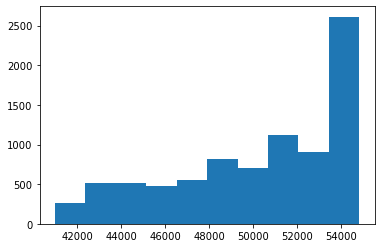

In [49]:
sunhours.dt.seconds

In [55]:
pd.to_datetime(comb['sunset'].map(lambda x: 1800 if x == 1760 else x), format='%H%M')

0      1900-01-01 19:17:00
1      1900-01-01 19:17:00
2      1900-01-01 19:17:00
3      1900-01-01 19:17:00
4      1900-01-01 19:17:00
               ...        
8470   1900-01-01 17:42:00
8471   1900-01-01 17:42:00
8472   1900-01-01 17:42:00
8473   1900-01-01 17:42:00
8474   1900-01-01 17:42:00
Name: sunset, Length: 8475, dtype: datetime64[ns]

(array([2042.,  736., 1239.,  727.,  984.,  536.,  438.,  989.,  467.,
         317.]),
 array([15360., 15966., 16572., 17178., 17784., 18390., 18996., 19602.,
        20208., 20814., 21420.]),
 <BarContainer object of 10 artists>)

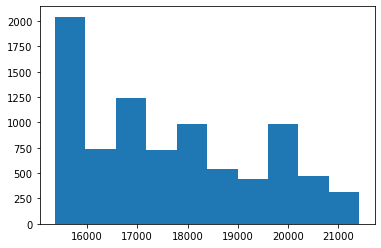

In [67]:
plt.hist((pd.to_datetime(comb['sunrise'], format='%H%M') - pd.to_datetime(comb['sunrise'], format='%H%M').dt.normalize()).dt.seconds)

In [78]:
# convert sunrise & sunset to datetime
sunrise = pd.to_datetime(comb['sunrise'], format='%H%M')

# fix entries - round off 60min to the next hour
sunset = pd.to_datetime(comb['sunset'].map(lambda x: 1800 if x == 1760 else x), format='%H%M')

# convert to seconds from start of day to be consistent input into model
comb['sunrise'] = (sunrise - sunrise.dt.normalize()).dt.seconds
comb['sunset'] = (sunset - sunset.dt.normalize()).dt.seconds

# add total sunlight time feature
comb['total_sunlight_time'] = (sunset - sunrise).dt.seconds

In [79]:
comb[['sunrise', 'sunset', 'total_sunlight_time']].dtypes

sunrise                int64
sunset                 int64
total_sunlight_time    int64
dtype: object

In [81]:
comb.corr()['wnvpresent'].abs().sort_values(ascending=False)

wnvpresent             1.000000
avgspeed_lag28         0.138465
rel_humid_lag14        0.136085
tavg_lag28             0.131077
rel_humid_lag28        0.126917
rel_humid_lag5         0.111116
species_ord            0.108576
avgspeed_lag14         0.102773
week_number            0.100561
tavg_lag14             0.100259
dewpoint               0.093796
wetbulb                0.092873
tmin                   0.089966
sunrise                0.089441
tavg                   0.078990
FG                     0.077763
rel_humid              0.076778
longitude              0.076732
cool                   0.075642
tavg_lag5              0.074510
total_sunlight_time    0.072581
depart                 0.062433
tmax                   0.059624
sunset                 0.058682
preciptotal_lag14      0.058202
heat                   0.056600
resultspeed            0.051956
avgspeed_lag5          0.043266
BR                     0.039913
avgspeed               0.033914
preciptotal_lag5       0.033775
latitude

In [3]:
train = pd.read_csv('../../assets/train_combined.csv', parse_dates=['date'])
test = pd.read_csv('../../assets/test_combined.csv', parse_dates=['date'])

In [4]:
train

,date,latitude,longitude,species_ord,wnvpresent,tmax,tmin,tavg,depart,dewpoint,...,rel_humid_lag5,rel_humid_lag14,rel_humid_lag28,avgspeed_lag5,avgspeed_lag14,avgspeed_lag28,preciptotal_lag5,preciptotal_lag14,preciptotal_lag28,weekofyear
0,2007-05-29,41.731922,-87.677512,2.0,0,88,62,75,11,58,...,59.221367,40.692805,38.885597,7.51,9.682143,10.200000,0.15,0.069286,0.055357,22
1,2007-05-29,41.688324,-87.676709,2.0,0,88,62,75,11,58,...,59.221367,40.692805,38.885597,7.51,9.682143,10.200000,0.15,0.069286,0.055357,22
2,2007-05-29,41.867108,-87.654224,2.0,0,88,62,75,11,58,...,59.221367,40.692805,38.885597,7.51,9.682143,10.200000,0.15,0.069286,0.055357,22
3,2007-05-29,41.891126,-87.611560,2.0,0,88,62,75,11,58,...,59.221367,40.692805,38.885597,7.51,9.682143,10.200000,0.15,0.069286,0.055357,22
4,2007-05-29,41.919343,-87.694259,2.0,0,88,62,75,11,58,...,59.221367,40.692805,38.885597,7.51,9.682143,10.200000,0.15,0.069286,0.055357,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,2013-09-26,41.750498,-87.605294,1.0,0,75,52,64,4,52,...,57.732860,60.788648,65.361296,6.48,8.296429,8.271429,0.00,0.100714,0.088214,39
8471,2013-09-26,41.803423,-87.642984,1.0,0,75,52,64,4,52,...,57.732860,60.788648,65.361296,6.48,8.296429,8.271429,0.00,0.100714,0.088214,39
8472,2013-09-26,41.867108,-87.654224,1.0,0,75,52,64,4,52,...,57.732860,60.788648,65.361296,6.48,8.296429,8.271429,0.00,0.100714,0.088214,39
8473,2013-09-26,41.963976,-87.691810,1.0,0,75,52,64,4,52,...,57.732860,60.788648,65.361296,6.48,8.296429,8.271429,0.00,0.100714,0.088214,39


In [5]:
lr = LogisticRegression(max_iter=10000)

In [6]:
X = train.drop(columns=['date','wnvpresent'])
y = train['wnvpresent']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [8]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [9]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [16]:
metrics.roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

0.815981974887343

In [17]:
gb = GradientBoostingClassifier()

In [18]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [19]:
metrics.roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1])

0.8508946930918317

In [ ]:
XGBClassifier()

In [23]:
xgb = XGBClassifier(random_state=42, n_jobs=-1)

xgb_params = { 
    'clf__max_depth': [3, 4], #Depth of tree (higher value implies liekly overfit)
    'clf__gamma' : [ 0.1, 0.2 , 0.3], #Min loss reduction required for further partition
    'clf__learning_rate' : [0.1, 0.2], #step size feature weight shrinkage
    'clf__use_label_encoder' : [False],
    'clf__eval_metric': ["auc"],
    "clf__objective" : ["binary:logistic"]
}

In [24]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_params = {
    'clf__n_estimators': [100, 150, 200],
    'clf__max_depth': [4, 5, 6]
}

In [25]:
# Extra Trees
et = ExtraTreesClassifier(random_state=42, n_jobs=-1)

et_params = {
    'clf__n_estimators': [50, 75, 100],
    'clf__max_depth': [5, 6, 7]
}

In [26]:
logreg = LogisticRegression(
    solver='liblinear',
    max_iter=1000, 
    random_state=42,
)

logreg_params = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.1, 1, 1.5, 2.5]
}

In [27]:
# Gradient Boost
gb = GradientBoostingClassifier(random_state=42)

gb_params = {
    'clf__learning_rate': [0.05, 0.1],
    'clf__max_depth': [2, 3]
}

In [28]:
# Support Vector Machine
svc = SVC(probability=True, random_state=42)

svc_params = {
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'clf__C': [2, 5, 10]
}

In [36]:
results = []

In [37]:
def model(clf, clf_params):
    
    
    # Instantiate pipeline
    pipe = Pipeline([
        ('ss', StandardScaler()),
        ('clf', clf)
    ])
    
    # Gridsearch for best estimator
    grid = GridSearchCV(
        pipe,
        param_grid=clf_params,
        scoring='roc_auc',
        verbose=2,
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    
    print(f'Classifier: {clf}')
    print('Best Parameters:')
    print(grid.best_params_)
    
    # Scoring metrics
    scores = {'Classifier': clf}
    y_preds = grid.predict(X_test)
    y_pred_probas = grid.predict_proba(X_test)[:, 1]
    y_train_pred_probas = grid.predict_proba(X_train)[:, 1]
    scores['Train ROC-AUC Score'] = metrics.roc_auc_score(y_train, y_train_pred_probas)
    scores['Test ROC-AUC Score'] = metrics.roc_auc_score(y_test, y_pred_probas)
    scores['F1'] = metrics.f1_score(y_test, y_preds)
    scores['Precision'] = metrics.precision_score(y_test, y_preds)
    scores['Recall'] = metrics.recall_score(y_test, y_preds)
    scores['Accuracy'] = metrics.accuracy_score(y_test, y_preds)
    
    # Storing results
    results.append(scores)
    
    return pipe

In [38]:
classifiers = [
    (logreg, logreg_params),
    (gb, gb_params),
    (svc, svc_params),
    (xgb, xgb_params),
    (rf, rf_params),
    (et, et_params)
]

In [39]:
for (clf, clf_params) in classifiers:
    model(clf, clf_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Classifier: LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
Best Parameters:
{'clf__C': 2.5, 'clf__penalty': 'l1'}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\rifqi\anaconda3\envs\dsi\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: GradientBoostingClassifier(random_state=42)
Best Parameters:
{'clf__learning_rate': 0.1, 'clf__max_depth': 3}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Classifier: SVC(probability=True, random_state=42)
Best Parameters:
{'clf__C': 5, 'clf__kernel': 'poly'}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Classifier: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              random_state=42, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
Best Parame

In [40]:
pd.DataFrame(results).sort_values(by='Test ROC-AUC Score', ascending=False).reset_index(drop=True)

,Classifier,Train ROC-AUC Score,Test ROC-AUC Score,F1,Precision,Recall,Accuracy
0,"XGBClassifier(base_score=None, booster=None, c...",0.903887,0.852955,0.065574,0.500000,0.035088,0.946201
1,GradientBoostingClassifier(random_state=42),0.915044,0.850895,0.173913,0.500000,0.105263,0.946201
2,"RandomForestClassifier(n_jobs=-1, random_state...",0.908825,0.848637,0.017391,1.000000,0.008772,0.946673
3,"ExtraTreesClassifier(n_jobs=-1, random_state=42)",0.886294,0.836459,0.017391,1.000000,0.008772,0.946673
4,"LogisticRegression(max_iter=1000, random_state...",0.856120,0.823765,0.000000,0.000000,0.000000,0.946201
5,"SVC(probability=True, random_state=42)",0.805743,0.708934,0.017094,0.333333,0.008772,0.945729


In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
Xsm, ysm = sm.fit_resample(X, y)

In [43]:
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(Xsm, ysm, stratify=ysm)

In [44]:
sssm = StandardScaler()
Xsm_train = sssm.fit_transform(Xsm_train)
Xsm_test = sssm.transform(Xsm_test)

In [45]:
results_smote = []

In [48]:
def model_smote(clf, clf_params):
    
    
    # Instantiate pipeline
    pipe = Pipeline([
        ('ss', StandardScaler()),
        ('clf', clf)
    ])
    
    # Gridsearch for best estimator
    grid = GridSearchCV(
        pipe,
        param_grid=clf_params,
        scoring='roc_auc',
        verbose=2,
        n_jobs=-1
    )

    grid.fit(Xsm_train, ysm_train)
    
    print(f'Classifier: {clf}')
    print('Best Parameters:')
    print(grid.best_params_)
    
    # Scoring metrics
    scores = {'Classifier': clf}
    y_preds = grid.predict(Xsm_test)
    y_pred_probas = grid.predict_proba(Xsm_test)[:, 1]
    y_train_pred_probas = grid.predict_proba(Xsm_train)[:, 1]
    scores['Train ROC-AUC Score'] = metrics.roc_auc_score(ysm_train, y_train_pred_probas)
    scores['Test ROC-AUC Score'] = metrics.roc_auc_score(ysm_test, y_pred_probas)
    scores['F1'] = metrics.f1_score(ysm_test, y_preds)
    scores['Precision'] = metrics.precision_score(ysm_test, y_preds)
    scores['Recall'] = metrics.recall_score(ysm_test, y_preds)
    scores['Accuracy'] = metrics.accuracy_score(ysm_test, y_preds)
    
    # Storing results
    results_smote.append(scores)
    
    return pipe

In [49]:
classifiers = [
    (logreg, logreg_params),
    (gb, gb_params),
    (svc, svc_params),
    (xgb, xgb_params),
    (rf, rf_params),
    (et, et_params)
]

In [50]:
for (clf, clf_params) in classifiers:
    model_smote(clf, clf_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Classifier: LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
Best Parameters:
{'clf__C': 2.5, 'clf__penalty': 'l1'}
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Classifier: GradientBoostingClassifier(random_state=42)
Best Parameters:
{'clf__learning_rate': 0.1, 'clf__max_depth': 3}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Classifier: SVC(probability=True, random_state=42)
Best Parameters:
{'clf__C': 10, 'clf__kernel': 'rbf'}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Classifier: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
           

In [51]:
pd.DataFrame(results_smote).sort_values(by='Test ROC-AUC Score', ascending=False).reset_index(drop=True)

,Classifier,Train ROC-AUC Score,Test ROC-AUC Score,F1,Precision,Recall,Accuracy
0,"XGBClassifier(base_score=None, booster=None, c...",0.982047,0.973150,0.911022,0.864308,0.963074,0.905962
1,GradientBoostingClassifier(random_state=42),0.937149,0.929201,0.867633,0.816461,0.925649,0.858818
2,"SVC(probability=True, random_state=42)",0.921571,0.916537,0.866908,0.793289,0.955589,0.853330
3,"RandomForestClassifier(n_jobs=-1, random_state...",0.897392,0.887590,0.842637,0.752946,0.956587,0.821402
4,"ExtraTreesClassifier(n_jobs=-1, random_state=42)",0.885257,0.876055,0.827969,0.745702,0.930639,0.806685
5,"LogisticRegression(max_iter=1000, random_state...",0.863394,0.854800,0.801010,0.741606,0.870758,0.783737


In [58]:
xgb_final = XGBClassifier(
    use_label_encoder=False,
    eval_metric='auc',
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1
)

xgb_final_params = { 
    'max_depth': [3, 4, 5, 6], #Depth of tree (higher value implies liekly overfit)
    'gamma' : [0.1, 0.15, 0.2, 0.25, 0.3], #Min loss reduction required for further partition
    'learning_rate' : [0.1, 0.15, 0.2, 0.25, 0.3] #step size feature weight shrinkage
}

In [59]:
grid = GridSearchCV(
    xgb_final,
    param_grid=xgb_final_params,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

In [60]:
grid.fit(Xsm_train, ysm_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='auc',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                     

In [61]:
grid.best_params_

{'gamma': 0.3, 'learning_rate': 0.3, 'max_depth': 6}

In [65]:
metrics.roc_auc_score(ysm_train, grid.predict_proba(Xsm_train)[:, 1])

0.9983343510632186

In [66]:
metrics.roc_auc_score(ysm_test, grid.predict_proba(Xsm_test)[:, 1])

0.9904313567378957

In [68]:
metrics.accuracy_score(ysm_test, grid.predict(Xsm_test))

0.9511100024943876

In [69]:
metrics.recall_score(ysm_test, grid.predict(Xsm_test))

0.9580838323353293

In [93]:
xgb_final_final = XGBClassifier(
    gamma=0.2,
    learning_rate=0.2,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='auc',
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1
)

In [94]:
xgb_final_final.fit(Xsm, ysm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0.2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [95]:
xgb_final_final.predict_proba(test.drop(columns=['id', 'date']))[:, 1]

array([0.00150551, 0.00059344, 0.00150551, ..., 0.00326718, 0.00326718,
       0.00326718], dtype=float32)

In [96]:
submission = test[['id']]

In [97]:
submission.columns = ['Id']

In [98]:
submission['WnvPresent'] = xgb_final_final.predict_proba(test.drop(columns=['id', 'date']))[:, 1]

<ipython-input-98-85f4dfd61574>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['WnvPresent'] = xgb_final_final.predict_proba(test.drop(columns=['id', 'date']))[:, 1]


In [99]:
submission['WnvPresent']

0         0.001506
1         0.000593
2         0.001506
3         0.000188
4         0.000188
            ...   
116288    0.003267
116289    0.003267
116290    0.003267
116291    0.003267
116292    0.003267
Name: WnvPresent, Length: 116293, dtype: float32

(array([93299.,  7085.,  3960.,  2765.,  2450.,  2168.,  1830.,  1459.,
          874.,   403.]),
 array([8.0759182e-06, 9.6320748e-02, 1.9263342e-01, 2.8894609e-01,
        3.8525876e-01, 4.8157141e-01, 5.7788408e-01, 6.7419678e-01,
        7.7050942e-01, 8.6682212e-01, 9.6313477e-01], dtype=float32),
 <BarContainer object of 10 artists>)

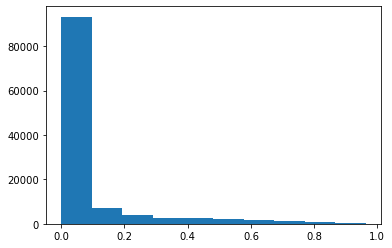

In [100]:
plt.hist(submission['WnvPresent'])

In [101]:
submission

,Id,WnvPresent
0,1,0.001506
1,2,0.000593
2,3,0.001506
3,4,0.000188
4,5,0.000188
...,...,...
116288,116289,0.003267
116289,116290,0.003267
116290,116291,0.003267
116291,116292,0.003267


In [102]:
submission.to_csv('./test_submission_2.csv', index=False)